In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [2]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

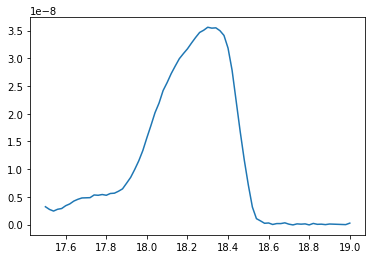

In [3]:
with open('Data/Hauptpeak Wasser.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
plt.plot(data[0],data[1])


err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.05
data = np.vstack([data,err])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 35
    # variables        = 3
    chi-square         = 2426.53733
    reduced chi-square = 75.8292915
    Akaike info crit   = 154.360537
    Bayesian info crit = 159.026581
[[Variables]]
    amplitude:  1.2774e-08 +/- 1.1331e-09 (8.87%) (init = 2.122046e-08)
    center:     18.1818071 +/- 0.01066235 (0.06%) (init = 18.24)
    sigma:      0.13258090 +/- 0.00510981 (3.85%) (init = 0.2)
    fwhm:       0.31220416 +/- 0.01203268 (3.85%) == '2.3548200*sigma'
    height:     3.8436e-08 +/- 4.2112e-09 (10.96%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.730
    C(amplitude, sigma)  = -0.387
    C(amplitude, center) = 0.193


array([[1.79000000e+01, 1.79100000e+01, 1.79200000e+01, 1.79300000e+01,
        1.79400000e+01, 1.79500000e+01, 1.79600000e+01, 1.79700000e+01,
        1.79800000e+01, 1.79900000e+01, 1.80000000e+01, 1.80100000e+01,
        1.80200000e+01, 1.80300000e+01, 1.80400000e+01, 1.80500000e+01,
        1.80600000e+01, 1.80700000e+01, 1.80800000e+01, 1.80900000e+01,
        1.81000000e+01, 1.81100000e+01, 1.81200000e+01, 1.81300000e+01,
        1.81400000e+01, 1.81500000e+01, 1.81600000e+01, 1.81700000e+01,
        1.81800000e+01, 1.81900000e+01, 1.82000000e+01, 1.82100000e+01,
        1.82200000e+01, 1.82300000e+01, 1.82400000e+01, 1.82500000e+01,
        1.82600000e+01, 1.82700000e+01, 1.82800000e+01, 1.82900000e+01,
        1.83000000e+01, 1.83100000e+01, 1.83200000e+01, 1.83300000e+01,
        1.83400000e+01, 1.83500000e+01, 1.83600000e+01, 1.83700000e+01,
        1.83800000e+01, 1.83900000e+01, 1.84000000e+01, 1.84100000e+01,
        1.84200000e+01, 1.84300000e+01, 1.84400000e+01, 1.845000

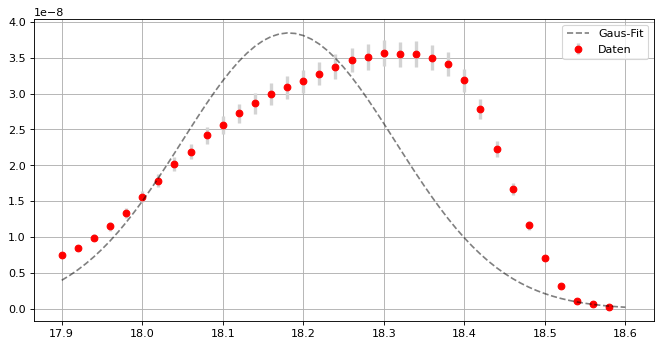

In [5]:
von =17.9
bis =18.6
vonarr = pos(von)
bisarr = pos(bis)

model_gaus = lmfit.models.GaussianModel()  
pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])

#Fitten
out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
#plt.savefig('Results/'+str(path)+'.pdf')
print(out_gaus.fit_report())
np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])

In [7]:
five = ufloat(out_gaus.params['height'].value,out_gaus.params['height'].stderr)*0.05
five = out_gaus.params['height'].value*0.05

bound=[]
for i in np.arange(17,19,0.0001):
    if out_gaus.eval(x=i) >= five:
        bound.append(i)
dm = ufloat(bound[-1],0.05)-ufloat(bound[0],0.05)
print(dm)

0.65+/-0.07
